**Title of Project:**

Big Sales Prediction

**Objective:**

Build a predictive model to estimate item outlet sales using a Random Forest Regressor and improve the accuracy of sales predictions and provide insights into the factors influencing sales performance.

**Data Source:**

The data for this project is sourced from the Kaggle Big Sales Prediction dataset

**Import Library**

In [ ]:
import pandas as pd

In [ ]:
import numpy as np


In [ ]:
import seaborn as sns

**Import Dataset**

In [ ]:
df = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Big%20Sales%20Data.csv')

**Describe Data**

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDT36,12.3,Low Fat,0.111448,Baking Goods,33.4874,OUT049,1999,Medium,Tier 1,Supermarket Type1,436.608721
1,FDT36,12.3,Low Fat,0.111904,Baking Goods,33.9874,OUT017,2007,Medium,Tier 2,Supermarket Type1,443.127721
2,FDT36,12.3,LF,0.111728,Baking Goods,33.9874,OUT018,2009,Medium,Tier 3,Supermarket Type2,564.598400
3,FDT36,12.3,Low Fat,0.000000,Baking Goods,34.3874,OUT019,1985,Small,Tier 1,Grocery Store,1719.370000
4,FDP12,9.8,Regular,0.045523,Baking Goods,35.0874,OUT017,2007,Medium,Tier 2,Supermarket Type1,352.874000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11815 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11815.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.788355,0.065953,141.004977,1997.830681,2185.836320
std,4.654126,0.051459,62.086938,8.371664,1827.479550
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,922.135101
50%,12.500000,0.054021,142.247000,1999.000000,1768.287680
75%,16.750000,0.094037,185.855600,2004.000000,2988.110400
max,30.000000,0.328391,266.888400,2009.000000,31224.726950


In [ ]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2389
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**Data Visualization**

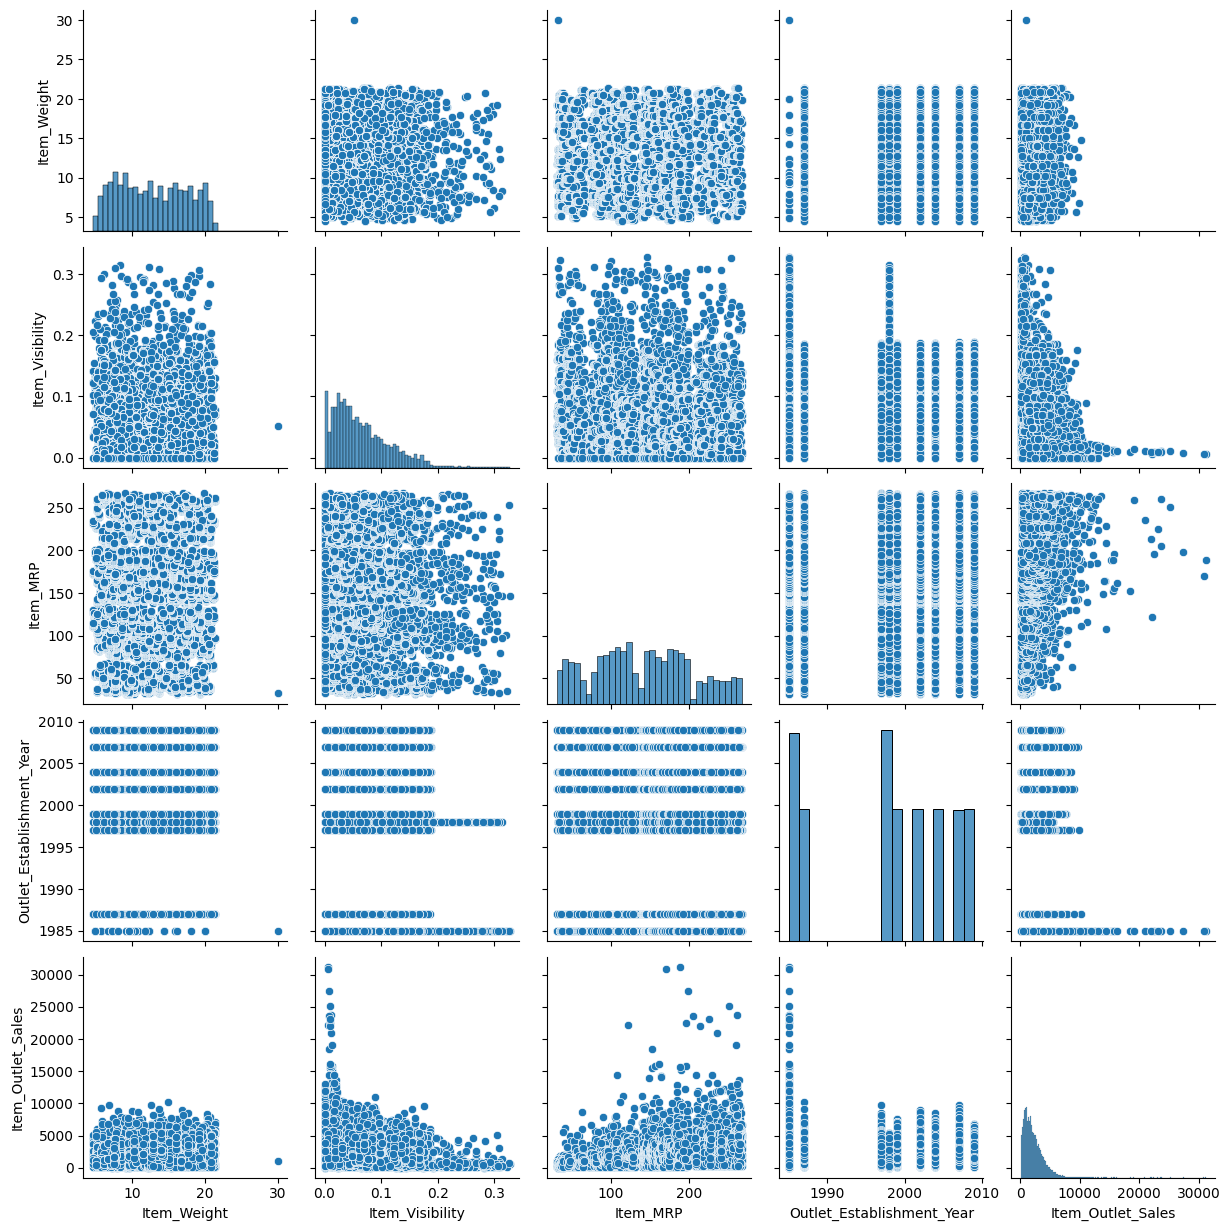

In [ ]:
sns.pairplot(df)

**Data Preprocessing**

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
knn = KNNImputer(n_neighbors=5)

In [ ]:
df['Item_Weight'] = knn.fit_transform(df[['Item_Weight']])

In [ ]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

**Remove outlier**

In [ ]:
from scipy import stats

In [ ]:
df = df[np.abs(stats.zscore(df['Item_Outlet_Sales'])) < 2]

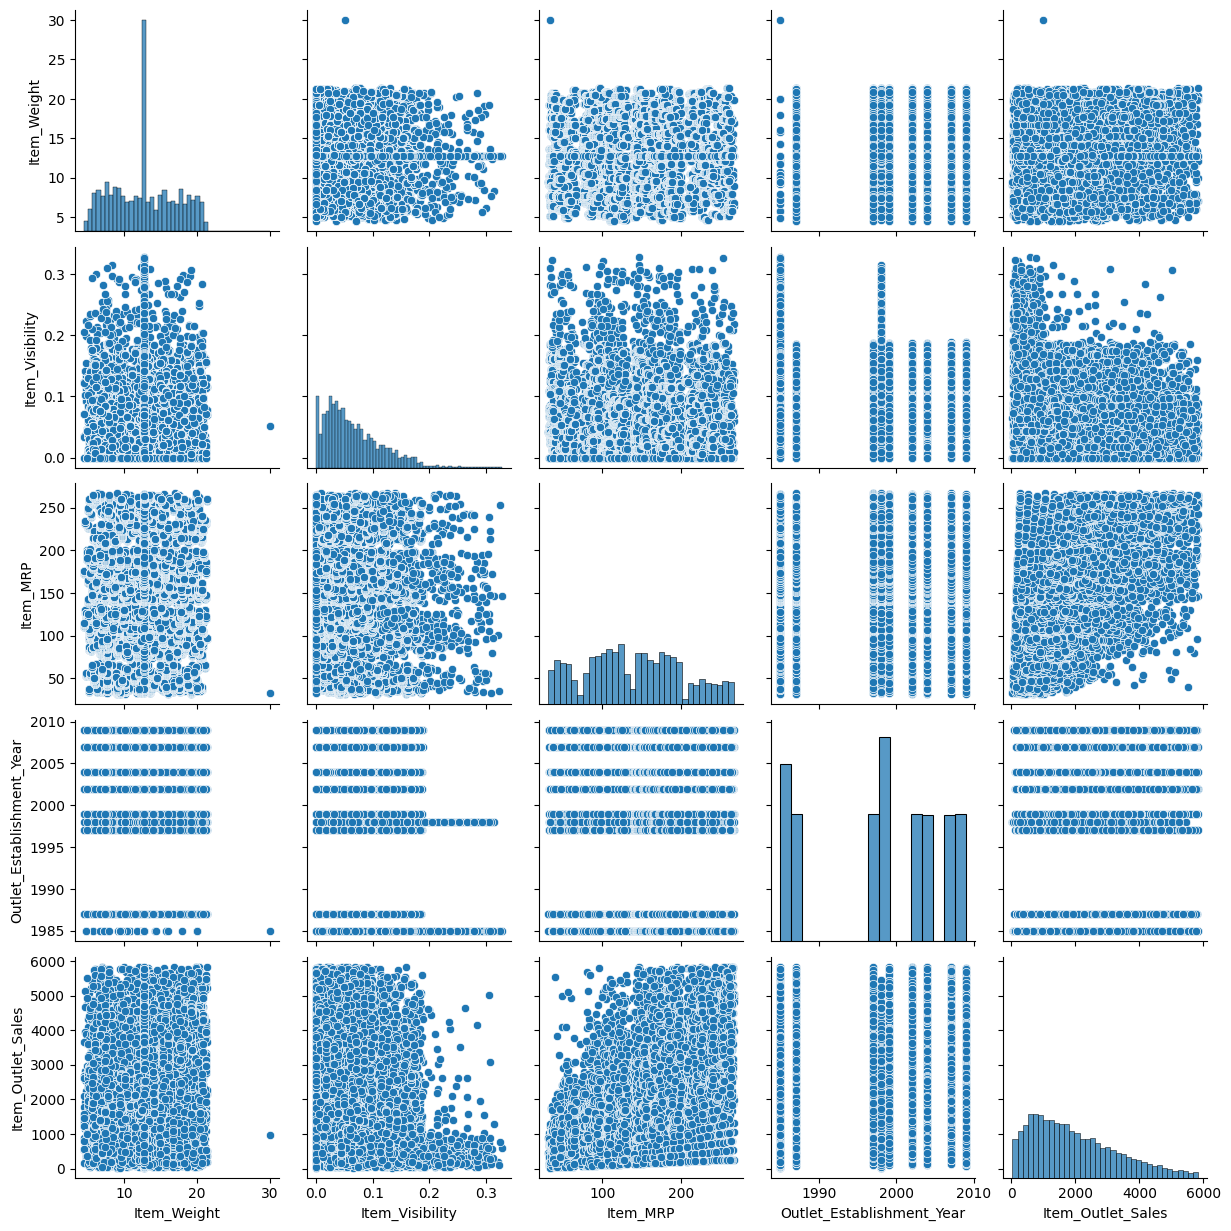

In [ ]:
sns.pairplot(df)

**Categorical Count**

In [ ]:
df[['Item_Identifier']].value_counts()

Item_Identifier
FDQ08              10
FDD58              10
FDD56              10
FDD53              10
FDY36              10
                   ..
FDC02               5
FDY55               5
NCL42               5
FDT21               5
FDA15               3
Name: count, Length: 1559, dtype: int64

In [ ]:
df[['Item_Fat_Content']].value_counts()

Item_Fat_Content
Low Fat             8173
Regular             4665
LF                   512
reg                  190
low fat              170
Name: count, dtype: int64

In [ ]:
df.replace({'Item_Fat_Content': {'LF':'Low Fat','reg':'Regular', 'low fat':'Low Fat'}}, inplace=True)

<ipython-input-82-60a4f5496317>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace({'Item_Fat_Content': {'LF':'Low Fat','reg':'Regular', 'low fat':'Low Fat'}}, inplace=True)


In [ ]:
df[['Item_Fat_Content']].value_counts()

Item_Fat_Content
Low Fat             8855
Regular             4855
Name: count, dtype: int64

**Encoding**

In [ ]:
df.replace({'Item_Fat_Content': {'Low Fat': 0,'Regular' : 1}}, inplace=True)

<ipython-input-84-3785fa71ef1e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace({'Item_Fat_Content': {'Low Fat': 0,'Regular' : 1}}, inplace=True)


In [ ]:
df[['Item_Type']].value_counts()

Item_Type            
Fruits and Vegetables    1939
Snack Foods              1917
Household                1491
Frozen Foods             1372
Dairy                    1091
Baking Goods             1062
Canned                   1048
Health and Hygiene        828
Meat                      710
Soft Drinks               703
Breads                    406
Hard Drinks               347
Others                    273
Starchy Foods             261
Breakfast                 177
Seafood                    85
Name: count, dtype: int64

In [ ]:
df.replace({'Item_Type':{'Fruits and Vegetables':0,'Snack Foods':0,'Household':1,
                         'Frozen Foods' : 0, 'Dairy' : 0, 'Baking Goods' : 0,
                         'Canned' : 0, 'Health and Hygiene' : 1,
                         'Meat' : 0, 'Soft Drinks' : 0, 'Breads' : 0, 'Hard Drinks' : 0,
                         'Others' : 2,'Starchy Foods' : 0, 'Breakfast' : 0, 'Seafood' : 0
                         }},inplace=True)

<ipython-input-86-c5a5872f7fdc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace({'Item_Type':{'Fruits and Vegetables':0,'Snack Foods':0,'Household':1,


In [ ]:
df[['Item_Type']].value_counts()

Item_Type
0            11118
1             2319
2              273
Name: count, dtype: int64

In [ ]:
df[['Outlet_Identifier']].value_counts()

Outlet_Identifier
OUT018               1529
OUT046               1529
OUT013               1525
OUT045               1523
OUT049               1520
OUT035               1517
OUT017               1511
OUT027               1284
OUT010                925
OUT019                847
Name: count, dtype: int64

In [ ]:
df.replace({'Outlet_Identifier':{'OUT027': 0,'OUT013': 1,
                         'OUT049' : 2, 'OUT046' : 3, 'OUT035' : 4,
                         'OUT045' : 5, 'OUT018' : 6,
                         'OUT017' : 7, 'OUT010' : 8, 'OUT019' : 9,
                         }},inplace=True)

<ipython-input-89-c39c93d41bf7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace({'Outlet_Identifier':{'OUT027': 0,'OUT013': 1,


In [ ]:
df[['Outlet_Identifier']].value_counts()

Outlet_Identifier
3                    1529
6                    1529
1                    1525
5                    1523
2                    1520
4                    1517
7                    1511
0                    1284
8                     925
9                     847
Name: count, dtype: int64

In [ ]:
df[['Outlet_Size']].value_counts()

Outlet_Size
Medium         6768
Small          5417
High           1525
Name: count, dtype: int64

In [ ]:
df.replace({'Outlet_Size': {'Small': 0,'Medium' : 1, 'High' : 1}}, inplace=True)

<ipython-input-92-7cc535b9e73a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace({'Outlet_Size': {'Small': 0,'Medium' : 1, 'High' : 1}}, inplace=True)


In [ ]:
df[['Outlet_Size']].value_counts()

Outlet_Size
1              8293
0              5417
Name: count, dtype: int64

In [ ]:
df[['Outlet_Location_Type']].value_counts()

Outlet_Location_Type
Tier 3                  5263
Tier 2                  4551
Tier 1                  3896
Name: count, dtype: int64

In [ ]:
df.replace({'Outlet_Location_Type': {'Tier 1': 0,'Tier 2' : 1, 'Tier 3' : 2}}, inplace=True)

<ipython-input-95-f5deb019297b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace({'Outlet_Location_Type': {'Tier 1': 0,'Tier 2' : 1, 'Tier 3' : 2}}, inplace=True)


In [ ]:
df[['Outlet_Location_Type']].value_counts()

Outlet_Location_Type
2                       5263
1                       4551
0                       3896
Name: count, dtype: int64

In [ ]:
df[['Outlet_Type']].value_counts()

Outlet_Type      
Supermarket Type1    9125
Grocery Store        1772
Supermarket Type2    1529
Supermarket Type3    1284
Name: count, dtype: int64

In [ ]:
df.replace({'Outlet_Type': {'Grocery Store': 0,'Supermarket Type1' : 1, 'Supermarket Type2' : 2, 'Supermarket Type3': 3}}, inplace=True)

<ipython-input-98-7cbaa4eced14>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace({'Outlet_Type': {'Grocery Store': 0,'Supermarket Type1' : 1, 'Supermarket Type2' : 2, 'Supermarket Type3': 3}}, inplace=True)


In [ ]:
df[['Outlet_Type']].value_counts()


Outlet_Type
1              9125
0              1772
2              1529
3              1284
Name: count, dtype: int64

**Define Target Variable (y) and Feature Variables (X)**

In [ ]:
y = df['Item_Outlet_Sales']

In [ ]:
X = df[['Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type']]

**Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=2529)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10968, 10), (2742, 10), (10968,), (2742,))

**Modeling**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfr = RandomForestRegressor()


In [ ]:
rfr.fit(X_train, y_train)

RandomForestRegressor()

**Model prediction**

In [ ]:
y_pred = rfr.predict(X_test)

In [ ]:
y_pred

array([2038.56907687,  649.5371226 ,  211.74999463, ...,  668.7100934 ,
        901.67344512, 1260.68697562])

**Model Evaluation**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [ ]:
mean_absolute_error(y_test, y_pred)

693.2295336066937

In [ ]:
mean_absolute_percentage_error(y_test, y_pred)

0.6375639254195549

In [ ]:
mean_squared_error(y_test, y_pred)


903959.5707853963

**Explanation**

This project involves analyzing and cleaning a sales dataset, transforming categorical variables into numerical ones, and predicting item outlet sales using a Random Forest Regressor. Initial data exploration identifies missing values, which are imputed using K-Nearest Neighbors. Categorical variables are encoded, and the dataset is split into training and testing sets. A Random Forest Regressor model is then trained and evaluated using mean absolute error, mean absolute percentage error, and mean squared error to ensure accurate sales predictions.






